In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import time
import pandas as pd

# Replace with your actual API key
API_KEY = 'fa99f22f70fca712a5db8b257a29a472'
city = 'Pune'

# Construct the URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'

# Initialize a list to store data over time
weather_data = []

# Loop to collect data
for _ in range(10):  # Example: Collect data 10 times
    try:
        response = requests.get(url)
        print(f"Request status code: {response.status_code}")  # Debugging line

        if response.status_code == 200:
            data = response.json()
            temp_celsius = data['main']['temp'] - 273.15
            humidity = data['main']['humidity']
            wind_speed = data['wind']['speed']
            weather_desc = data['weather'][0]['description']

            # Add data to the list
            weather_data.append({
                'timestamp': pd.Timestamp.now(),
                'temperature': temp_celsius,
                'humidity': humidity,
                'wind_speed': wind_speed,
                'weather': weather_desc
            })

            # Show the latest data collected for verification
            print("Data collected:", weather_data[-1])

        else:
            print(f"Failed to retrieve data: {response.status_code}")

    except requests.RequestException as e:
        print("An error occurred:", e)

    time.sleep(5)  # Adjust based on testing needs

# Create a DataFrame from the list after the loop completes
weather_data_df = pd.DataFrame(weather_data)

# Display the collected data
print(weather_data_df)


Request status code: 200
Data collected: {'timestamp': Timestamp('2025-11-06 20:40:03.954805'), 'temperature': 25.610000000000014, 'humidity': 73, 'wind_speed': 1.33, 'weather': 'overcast clouds'}
Request status code: 200
Data collected: {'timestamp': Timestamp('2025-11-06 20:40:09.122992'), 'temperature': 25.610000000000014, 'humidity': 73, 'wind_speed': 1.33, 'weather': 'overcast clouds'}
Request status code: 200
Data collected: {'timestamp': Timestamp('2025-11-06 20:40:14.194125'), 'temperature': 25.610000000000014, 'humidity': 73, 'wind_speed': 1.33, 'weather': 'overcast clouds'}
Request status code: 200
Data collected: {'timestamp': Timestamp('2025-11-06 20:40:19.784886'), 'temperature': 25.610000000000014, 'humidity': 73, 'wind_speed': 1.33, 'weather': 'overcast clouds'}
Request status code: 200
Data collected: {'timestamp': Timestamp('2025-11-06 20:40:24.844142'), 'temperature': 25.610000000000014, 'humidity': 73, 'wind_speed': 1.33, 'weather': 'overcast clouds'}
Request status 

In [4]:
# Calculate descriptive statistics
avg_temp = weather_data_df['temperature'].mean()
max_temp = weather_data_df['temperature'].max()
min_temp = weather_data_df['temperature'].min()

print(f"Average Temperature: {avg_temp:.2f}°C")
print(f"Maximum Temperature: {max_temp:.2f}°C")
print(f"Minimum Temperature: {min_temp:.2f}°C")


Average Temperature: 25.61°C
Maximum Temperature: 25.61°C
Minimum Temperature: 25.61°C


In [5]:
weather_data_df['timestamp'] = pd.to_datetime(weather_data_df['timestamp'])
daily_avg_temp = weather_data_df.set_index('timestamp').resample('D')['temperature'].mean()
print(daily_avg_temp)


timestamp
2025-11-06    25.61
Freq: D, Name: temperature, dtype: float64


In [13]:
import folium

# Correct coordinates with variation
coordinates = [
    (18.5204, 73.8567),  # Pune
    (19.0760, 72.8777),  # Mumbai
    (28.7041, 77.1025),  # Delhi
    (12.9716, 77.5946),  # Bangalore
    (22.5726, 88.3639)   # Kolkata
]

# Initialize a map centered around the first location
mymap = folium.Map(location=coordinates[0], zoom_start=5)

# Add markers for each coordinate
for coord in coordinates:
    folium.Marker(location=coord, popup=f"Lat: {coord[0]}, Lon: {coord[1]}").add_to(mymap)

# Save the map to an HTML file
mymap.save("correct_map.html")

# Display map in Jupyter (optional)
mymap


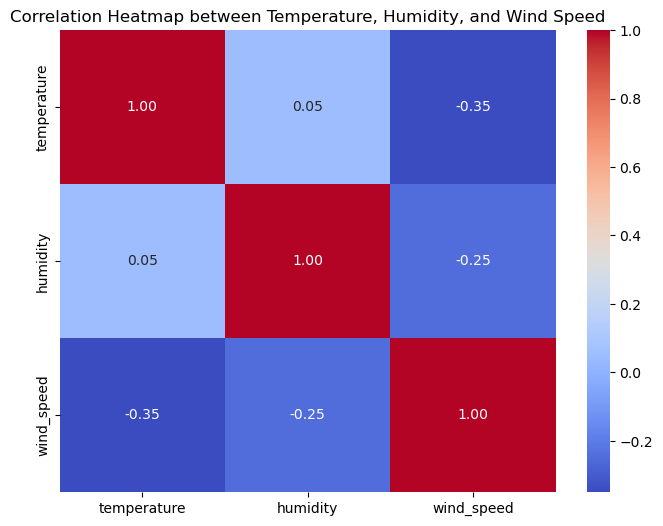

In [6]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with your OpenWeatherMap API key
API_KEY = 'fa99f22f70fca712a5db8b257a29a472'

# List of cities with geographical coordinates
locations = [
    {"city": "Pune", "lat": 18.5204, "lon": 73.8567},
    {"city": "Mumbai", "lat": 19.0760, "lon": 72.8777},
    {"city": "Delhi", "lat": 28.7041, "lon": 77.1025},
    {"city": "Bangalore", "lat": 12.9716, "lon": 77.5946},
    {"city": "Kolkata", "lat": 22.5726, "lon": 88.3639}
]

# Initialize an empty DataFrame to store weather data
weather_data = []

# Collect weather data for each location
for location in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location['city']}&appid={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        temp_celsius = data['main']['temp'] - 273.15  # Convert Kelvin to Celsius
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        weather_desc = data['weather'][0]['description']
        
        # Append data to the list
        weather_data.append({
            'city': location['city'],
            'temperature': temp_celsius,
            'humidity': humidity,
            'wind_speed': wind_speed,
            'weather': weather_desc
        })
    else:
        print(f"Failed to retrieve data for {location['city']}")

# Convert the list of dictionaries into a pandas DataFrame
weather_df = pd.DataFrame(weather_data)

# Calculate the correlation matrix between numeric weather attributes
correlation_matrix = weather_df[['temperature', 'humidity', 'wind_speed']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap between Temperature, Humidity, and Wind Speed")
plt.show()
